In [1]:
import os
import numpy as np
import pandas as pd
import re
import random

In [2]:
import matplotlib

In [3]:
dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

In [4]:
import glob

In [5]:
from skimage import io
folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
image_data = []
labels = []
for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    print(f"Reading images from folder: {folder_name}")
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    print(f"Found {len(image_files)} image files in folder {folder_name}")
    for image_file in image_files:
        print(f"Reading image file: {image_file}")
        image = io.imread(image_file)        
        image_data.append(image)
        if folder_name == 'mild_demented':
            labels.append(0)
        elif folder_name == 'moderate_demented':
            labels.append(1)
        elif folder_name == 'non_demented':
            labels.append(2)
        elif folder_name == 'very_mild_demented':
            labels.append(3)        
        print(f"Image file {image_file} read successfully!")

Reading images from folder: Mild_Demented
Found 896 image files in folder Mild_Demented
Reading image file: C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild.jpg
Image file C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild.jpg read successfully!
Reading image file: C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_10.jpg
Image file C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_10.jpg read successfully!
Reading image file: C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_100.jpg
Image file C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_100.jpg read successfully!
Reading image file: C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_101.jpg
Image file C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET\Mild_Demented\mild_101.j

In [6]:
image_data = np.array(image_data)
labels = np.array(labels)

In [8]:
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

Image data shape: (6400, 128, 128)
Labels shape: (0,)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:

folder_names = ['mild_demented', 'moderate_demented', 'non_demented', 'very_mild_demented']
labels = []

for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    if folder_name == 'mild_demented':
        labels.extend([0] * len(image_files))
    elif folder_name == 'moderate_demented':
        labels.extend([1] * len(image_files))
    elif folder_name == 'non_demented':
        labels.extend([2] * len(image_files))
    elif folder_name == 'very_mild_demented':
        labels.extend([3] * len(image_files))
labels = np.array(labels)

In [26]:
#kfold cross validation
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42)
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, val_index in kf.split(image_data):
    X_train, X_val = image_data[train_index], image_data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]    
    # For demonstration purposes using a dummy model
    y_pred = np.random.randint(0, 4, size=len(y_val))    
    accuracy = accuracy_score(y_val, y_pred)
    classification_report_ = classification_report(y_val, y_pred,output_dict=True)
    confusion_matrix_ = confusion_matrix(y_val, y_pred)
    accuracy_scores.append(accuracy)
    classification_reports.append(classification_report_)
    confusion_matrices.append(confusion_matrix_)

print(accuracy_scores)
for i, classification_report_ in enumerate(classification_reports):
    print(f"Fold {i+1}: Classification Report")
    print("=================================")
    print("              Precision    Recall  F1-Score  Support")
    print("-----------------------------------------------")
    for label, metrics in classification_report_.items():
        if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
            print(f"Class {label}:  {metrics['precision']:.3f}    {metrics['recall']:.3f}  {metrics['f1-score']:.3f}  {metrics['support']}")
    print("-----------------------------------------------")
    print(f"Accuracy: {accuracy_scores[i]:.3f}")
    print()
print(confusion_matrices)

[0.2515625, 0.25703125, 0.25390625, 0.2609375, 0.27265625]
Fold 1: Classification Report
              Precision    Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.146    0.224  0.176  201.0
Class 1:  0.003    0.167  0.006  6.0
Class 2:  0.505    0.246  0.331  643.0
Class 3:  0.360    0.274  0.311  430.0
-----------------------------------------------
Accuracy: 0.252

Fold 2: Classification Report
              Precision    Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.144    0.240  0.180  196.0
Class 1:  0.006    0.154  0.012  13.0
Class 2:  0.497    0.247  0.330  632.0
Class 3:  0.390    0.282  0.328  439.0
-----------------------------------------------
Accuracy: 0.257

Fold 3: Classification Report
              Precision    Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.113    0.224  0.151  156.0
Class 1:  0.012    0.286  0.024  14.0
Class 2:  0.494    0.258  0.339 

Fold 1: Class distribution:
Label
2    643
3    430
0    201
1      6
Name: count, dtype: int64


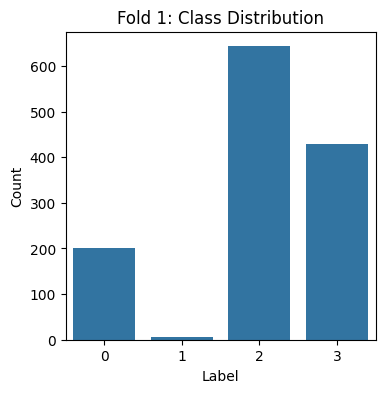

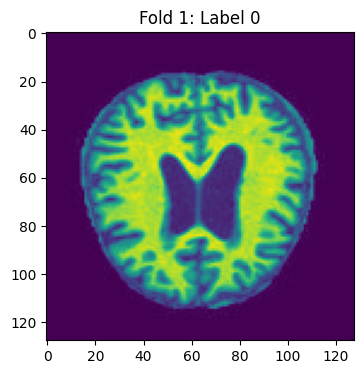

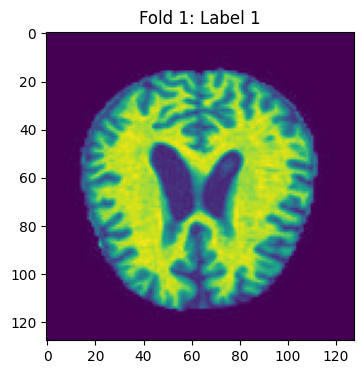

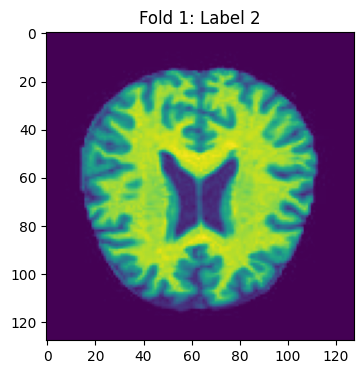

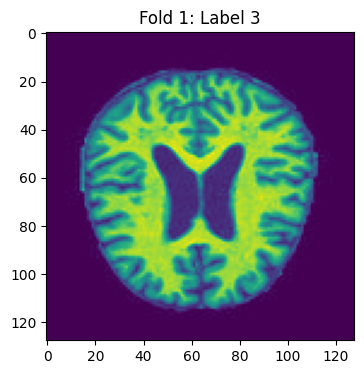

Fold 2: Class distribution:
Label
2    632
3    439
0    196
1     13
Name: count, dtype: int64


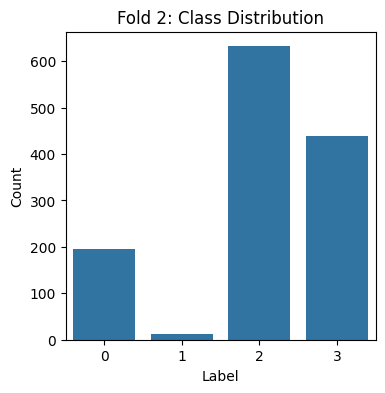

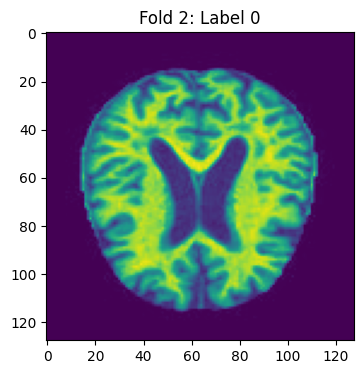

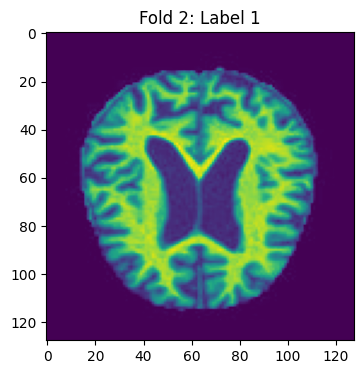

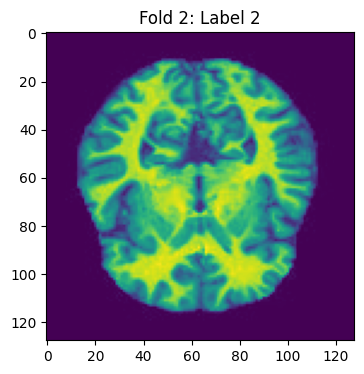

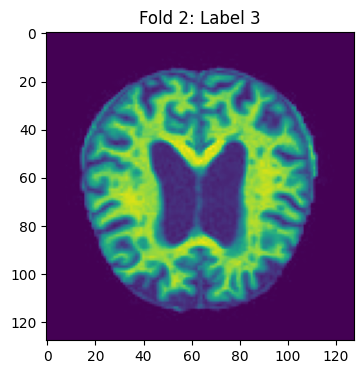

Fold 3: Class distribution:
Label
2    636
3    474
0    156
1     14
Name: count, dtype: int64


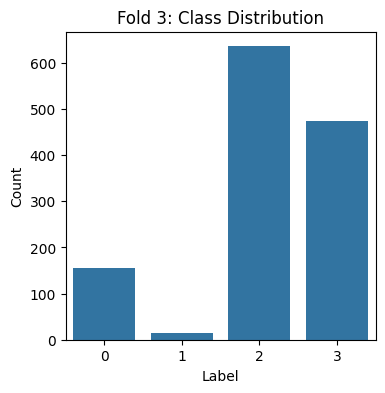

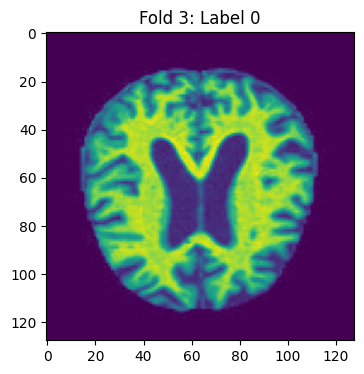

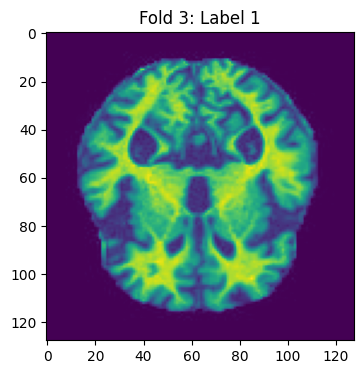

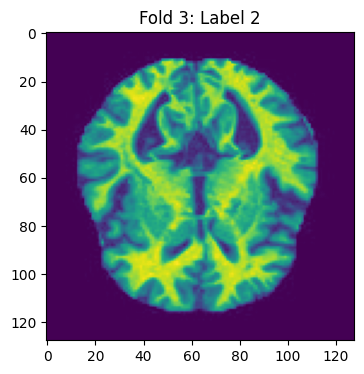

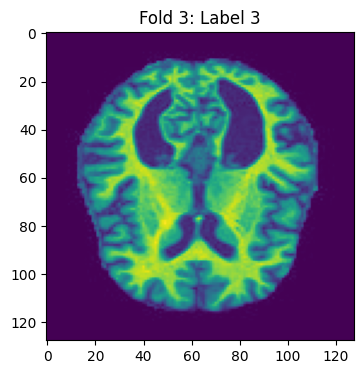

Fold 4: Class distribution:
Label
2    646
3    436
0    183
1     15
Name: count, dtype: int64


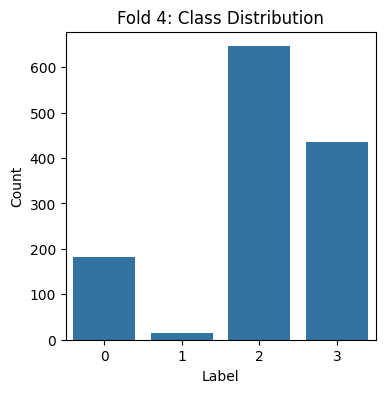

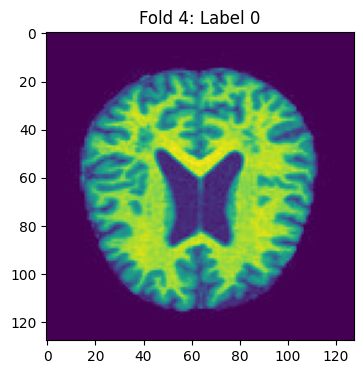

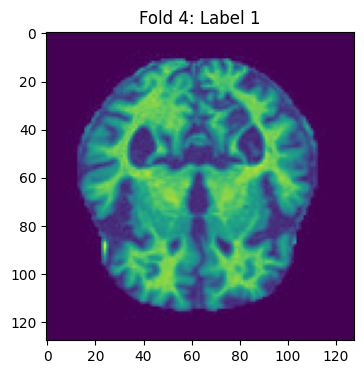

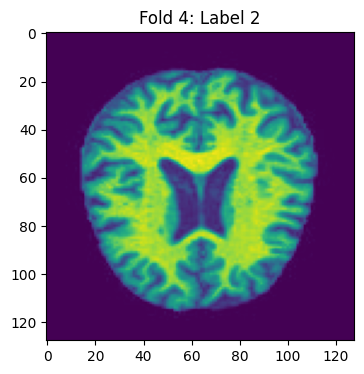

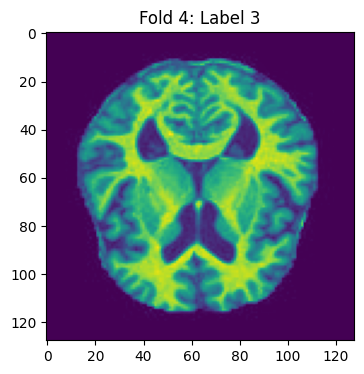

Fold 5: Class distribution:
Label
2    643
3    461
0    160
1     16
Name: count, dtype: int64


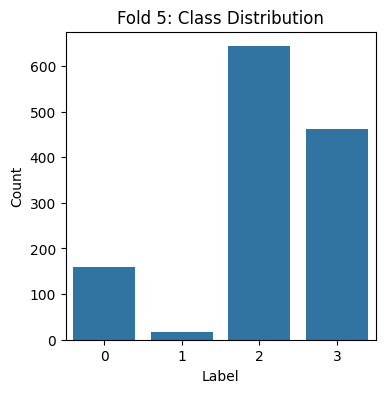

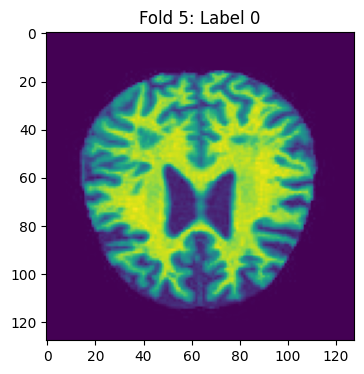

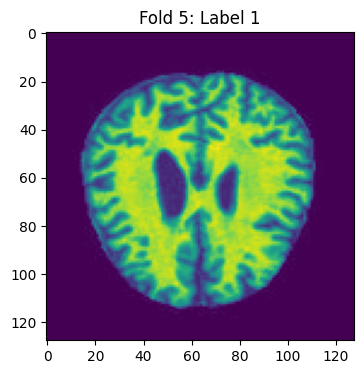

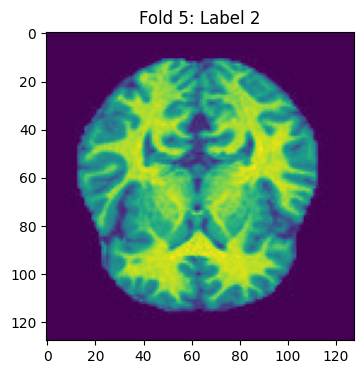

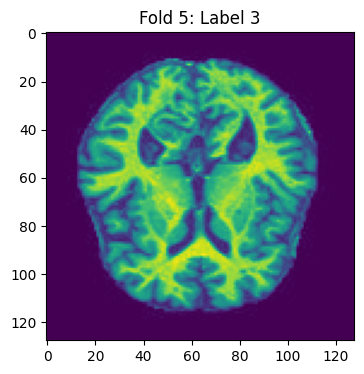

In [27]:
for i, (train_index, val_index) in enumerate(kf.split(image_data)):
    X_val = image_data[val_index]
    y_val = labels[val_index]
    df_val = pd.DataFrame({'Image': [img for img in X_val], 'Label': y_val})
    print(f"Fold {i+1}: Class distribution:")
    print(df_val['Label'].value_counts())
    plt.figure(figsize=(4,4))
    sns.countplot(x='Label', data=df_val)
    plt.title(f"Fold {i+1}: Class Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()
    for label in np.unique(y_val):
        image_idx = np.where(y_val == label)[0][0]
        image = X_val[image_idx]
        plt.figure(figsize=(4, 4))
        plt.imshow(image)
        plt.title(f"Fold {i+1}: Label {label}")
        plt.show()

(256, 16384) (256,)
Fold 1: Class distribution:
Label
3    15
0    13
2    13
1    11
Name: count, dtype: int64


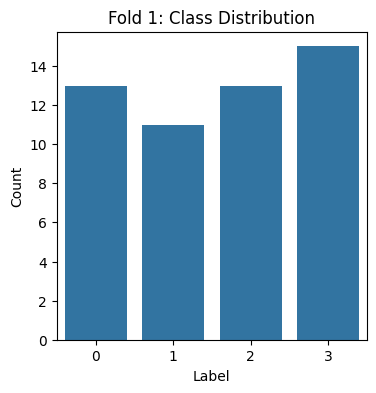

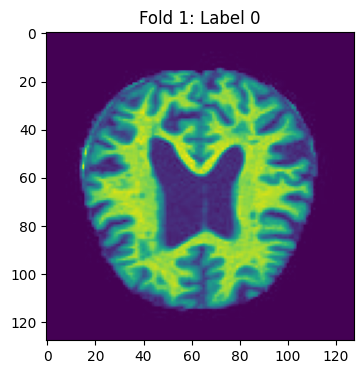

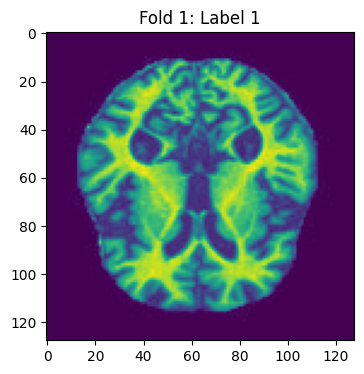

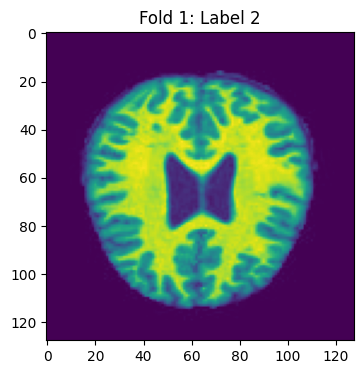

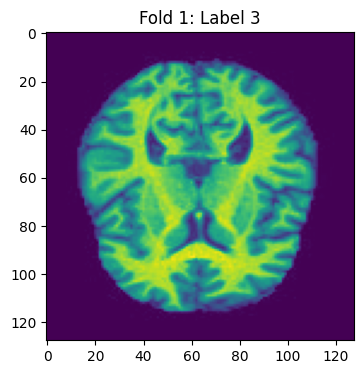

Fold 2: Class distribution:
Label
1    20
2    13
0    11
3     7
Name: count, dtype: int64


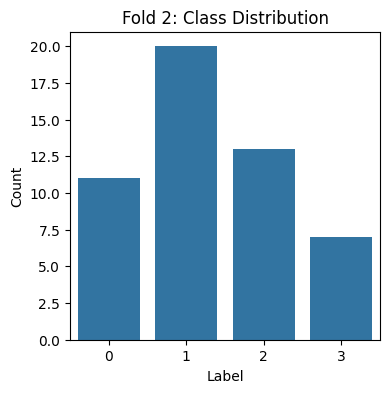

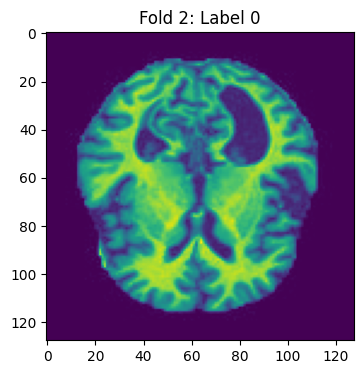

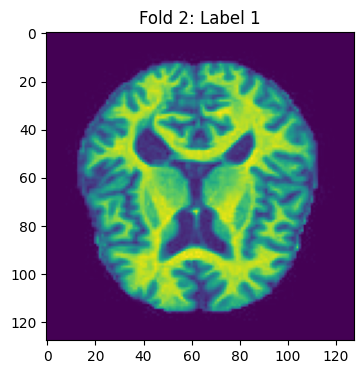

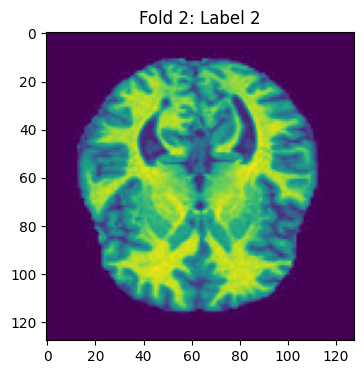

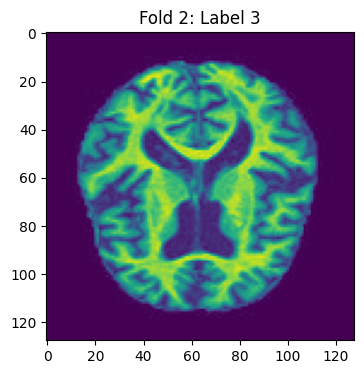

Fold 3: Class distribution:
Label
3    14
0    13
2    13
1    11
Name: count, dtype: int64


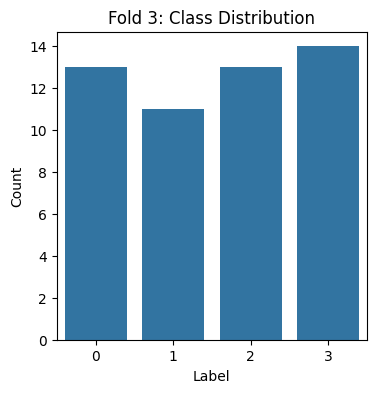

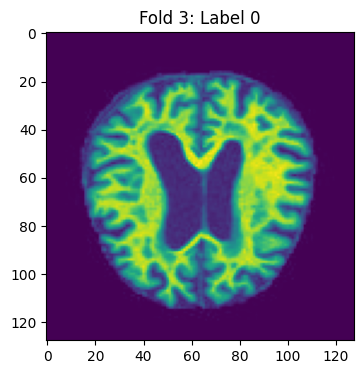

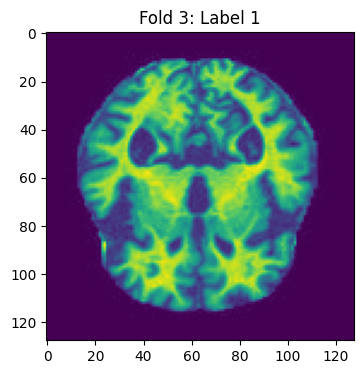

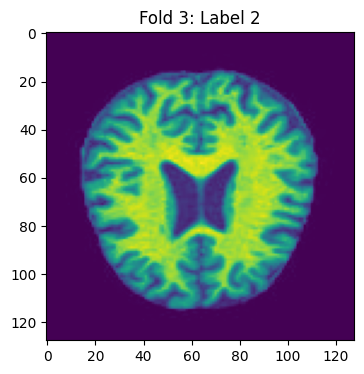

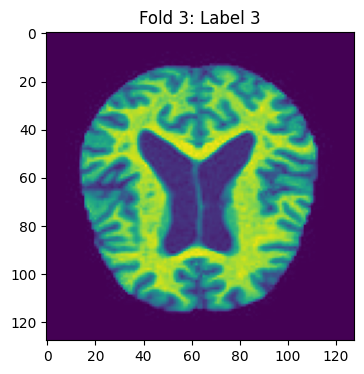

Fold 4: Class distribution:
Label
0    15
3    14
2    12
1    10
Name: count, dtype: int64


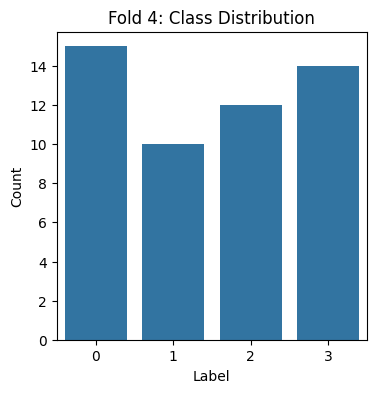

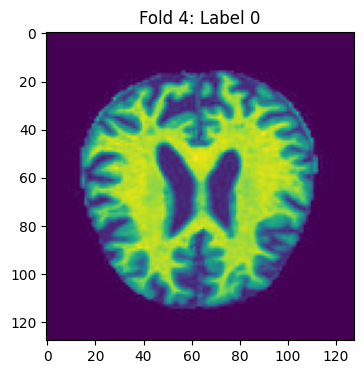

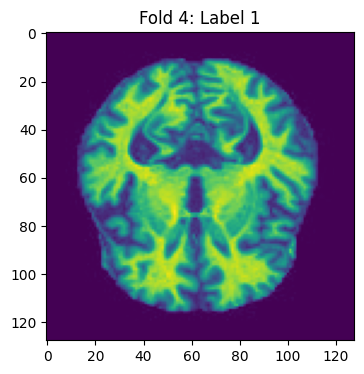

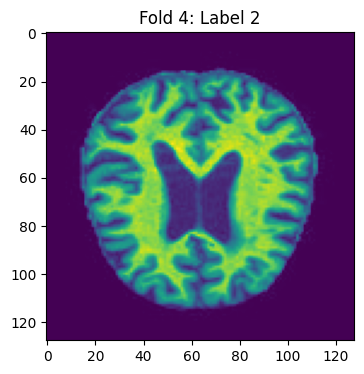

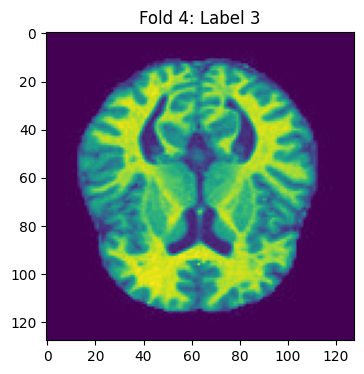

Fold 5: Class distribution:
Label
3    14
2    13
1    12
0    12
Name: count, dtype: int64


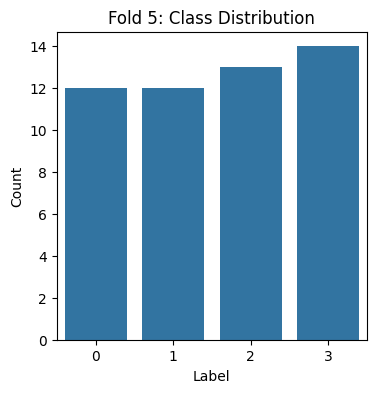

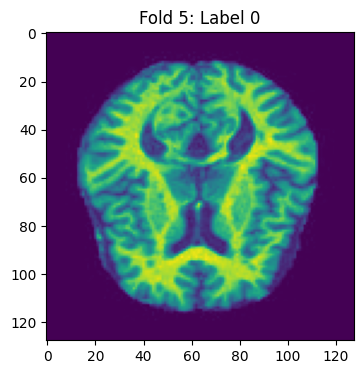

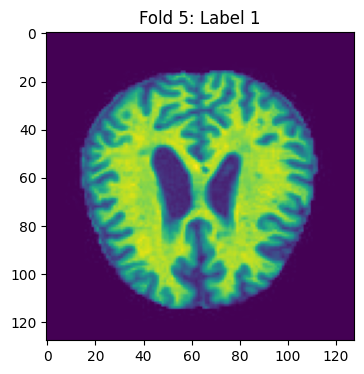

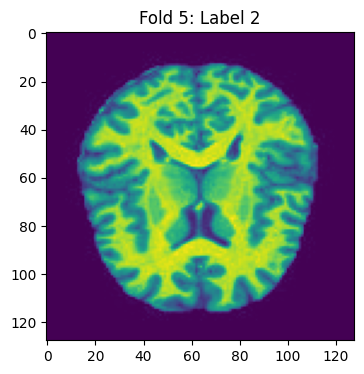

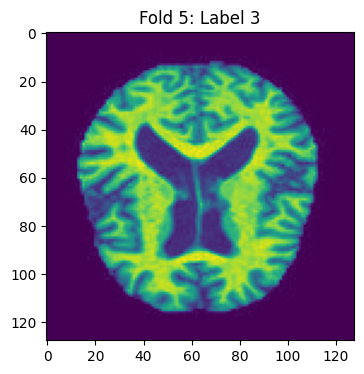

In [31]:
#THE DATASET IS VERY IMBALANCED SO WE'LL  BALANCE AND PERFORM EDA

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='all',random_state=42)
X_resampled, y_resampled = rus.fit_resample(image_data.reshape(-1, 128*128), labels)
print(X_resampled.shape, y_resampled.shape)
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42)
accuracy_scores = []
classification_reports = []
confusion_matrices = []
for train_index, val_index in kf.split(X_resampled):
    X_train, X_val = X_resampled[train_index], X_resampled[val_index]
    y_train, y_val = y_resampled[train_index], y_resampled[val_index]
    y_pred = np.random.randint(0, 4, size=len(y_val))
    accuracy = accuracy_score(y_val, y_pred)
    classification_report_ = classification_report(y_val, y_pred, output_dict = True)
    confusion_matrix_ = confusion_matrix(y_val, y_pred)
    accuracy_scores.append(accuracy)
    classification_reports.append(classification_report_)
    confusion_matrices.append(confusion_matrix_)

for i, (train_index, val_index) in enumerate(kf.split(X_resampled)):
    X_val = X_resampled[val_index]
    y_val = y_resampled[val_index]
    
    df_val = pd.DataFrame({'Image': [img for img in X_val], 'Label': y_val})
    print(f"Fold {i+1}: Class distribution:")
    print(df_val['Label'].value_counts())
    plt.figure(figsize=(4,4))
    sns.countplot(x='Label', data=df_val)
    plt.title(f"Fold {i+1}: Class Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

    for label in np.unique(y_val):
        image_idx = np.where(y_val == label)[0][0]
        image = X_val[image_idx]
        image = image.reshape(128, 128)
        plt.figure(figsize=(4,4))
        plt.imshow(image)
        plt.title(f"Fold {i+1}: Label {label}")
        plt.show()


In [34]:
print(accuracy_scores)
for i, classification_report_ in enumerate(classification_reports):
    print(f"Fold {i+1}: Classification Report")
    print("=================================")
    print("          Precision  Recall  F1-Score  Support")
    print("-----------------------------------------------")
    for label, metrics in classification_report_.items():
        if label != 'accuracy' and label != 'macro avg' and label != 'weighted avg':
            print(f"Class {label}:  {metrics['precision']:.3f}    {metrics['recall']:.3f}  {metrics['f1-score']:.3f}  {metrics['support']}")
    print("-----------------------------------------------")
    print(f"Accuracy: {accuracy_scores[i]:.3f}")
    print()
print(confusion_matrices)

[0.15384615384615385, 0.1568627450980392, 0.29411764705882354, 0.3137254901960784, 0.3137254901960784]
Fold 1: Classification Report
          Precision  Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.091    0.077  0.083  13.0
Class 1:  0.056    0.091  0.069  11.0
Class 2:  0.300    0.231  0.261  13.0
Class 3:  0.231    0.200  0.214  15.0
-----------------------------------------------
Accuracy: 0.154

Fold 2: Classification Report
          Precision  Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.118    0.182  0.143  11.0
Class 1:  0.133    0.100  0.114  20.0
Class 2:  0.364    0.308  0.333  13.0
Class 3:  0.000    0.000  0.000  7.0
-----------------------------------------------
Accuracy: 0.157

Fold 3: Classification Report
          Precision  Recall  F1-Score  Support
-----------------------------------------------
Class 0:  0.462    0.462  0.462  13.0
Class 1:  0.294    0.455  0.357  11.0
Class 2:  0.1

In [1]:
import os
import glob
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from imblearn.under_sampling import RandomUnderSampler
from PIL import Image
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import precision_score, recall_score, f1_score

folder_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

image_data = []
labels = []

dataset_path = r'C:\Users\suhan\Desktop\Capstone\alzheimers_detection\ADNI DATASET'

for folder_name in folder_names:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    
    for image_file in image_files:
        image = np.array(Image.open(image_file))
        image_data.append(image)
        
        
        if folder_name == 'Mild_Demented':
            labels.append(0)
        elif folder_name == 'Moderate_Demented':
            labels.append(1)
        elif folder_name == 'Non_Demented':
            labels.append(2)
        elif folder_name == 'Very_Mild_Demented':
            labels.append(3)


In [4]:
image_data = np.array(image_data)
labels = np.array(labels)
print("Image data shape:", image_data.shape)
print("Labels shape:", labels.shape)

image_data = image_data.reshape(image_data.shape[0], -1)


n_folds = 5


kf = KFold(n_folds, shuffle=True, random_state=42)




Image data shape: (6400, 16384)
Labels shape: (6400,)


In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


for train_index, test_index in kf.split(image_data):
    X_train, X_test = image_data[train_index], image_data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    
    pca = PCA(n_components=0.95)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    
    tsne = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train_pca)
    X_test_tsne = tsne.fit_transform(X_test_pca)

        
    space = {
        'C': hp.loguniform('C', -5, 2),
        'kernel': hp.choice('kernel', ['linear', 'rbf', 'poly']),
        'gamma': hp.loguniform('gamma', -5, 0),
        'degree': hp.quniform('degree', 2, 10, 1)
    }

    def objective(params):
        
        svc = SVC(**params)
        svc.degree = int(svc.degree)
        svc.fit(X_train_tsne, y_train)
        
        
        y_pred = svc.predict(X_test_tsne)
        accuracy = accuracy_score(y_test, y_pred)
        
        
        return -accuracy

    
    trials = Trials()
    best = fmin(objective, space, algo=tpe.suggest, trials=trials, max_evals=50)


    svc = SVC(**best)
    svc.fit(X_train_tsne, y_train)

    
    y_pred = svc.predict(X_test_tsne)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



  6%|▌         | 3/50 [33:25<7:40:10, 587.45s/trial, best loss: -0.45703125]  

In [ ]:
print(f'Average Accuracy: {np.mean(accuracy_scores):.3f}')
print(f'Average Precision: {np.mean(precision_scores):.3f}')
print(f'Average Recall: {np.mean(recall_scores):.3f}')
print(f'Average F1 Score: {np.mean(f1_scores):.3f}')